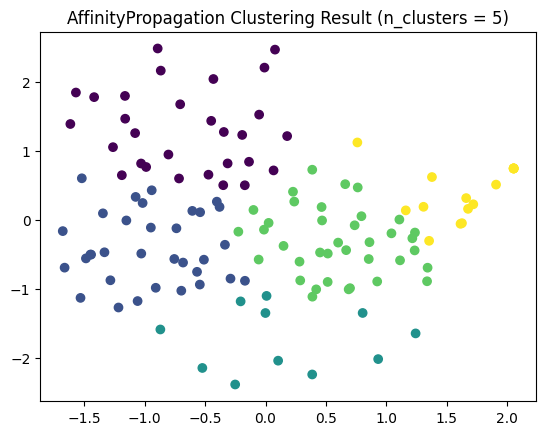

In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt

# Load data from CSV file

data = pd.read_csv('res/cluster_result.csv')

# Extract variables to be analyzed
X = data[['x', 'y']].values

# Set AffinityPropagation parameters
damping = 0.5
preference = -18

# Run AffinityPropagation clustering algorithm
af = AffinityPropagation(damping=damping, preference=preference).fit(X)

# Extract cluster labels and number of clusters
cluster_labels = af.labels_
n_clusters = len(set(cluster_labels))

# Plot the clustering result
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels)
plt.title('AffinityPropagation Clustering Result (n_clusters = {})'.format(n_clusters))
plt.show()

In [3]:
# Calculate silhouette coefficient
silhouette_avg = silhouette_score(X, cluster_labels)

# Calculate Davies-Bouldin Index (DBI)
dbi_score = davies_bouldin_score(X, cluster_labels)

# Calculate Calinski-Harabasz Index (CH)
ch_score = calinski_harabasz_score(X, cluster_labels)

# Print the evaluation metrics
print("Silhouette Coefficient: {:.3f}".format(silhouette_avg))
print("Davies-Bouldin Index: {:.3f}".format(dbi_score))
print("Calinski-Harabasz Index: {:.3f}".format(ch_score))

Silhouette Coefficient: 0.359
Davies-Bouldin Index: 0.829
Calinski-Harabasz Index: 101.903


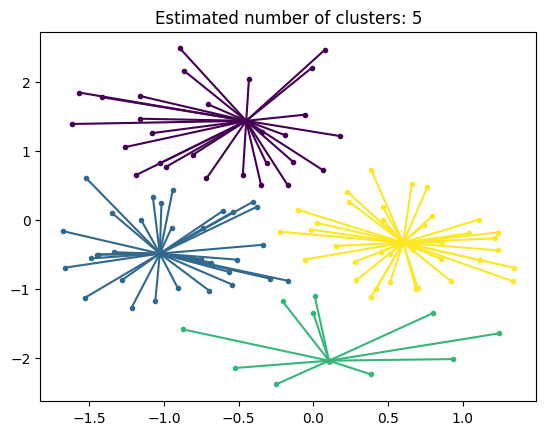

In [4]:
plt.close("all")
plt.figure(1)
plt.clf()

colors = plt.cycler("color", plt.cm.viridis(np.linspace(0, 1, 4)))

for k, col in zip(range(n_clusters), colors):
    class_members = cluster_labels == k
    cluster_centers_indices = af.cluster_centers_indices_
    cluster_center = X[cluster_centers_indices[k]]
    plt.scatter(
        X[class_members, 0], X[class_members, 1], color=col["color"], marker="."
    )
    plt.scatter(
        cluster_center[0], cluster_center[1], s=14, color=col["color"], marker="o"
    )
    for x in X[class_members]:
        plt.plot(
            [cluster_center[0], x[0]], [cluster_center[1], x[1]], color=col["color"]
        )

plt.title("Estimated number of clusters: %d" % n_clusters)
plt.show()